<a href="https://colab.research.google.com/github/ysg1202/automoblile/blob/main/0715_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🔧 필요한 라이브러리 설치
!pip install tensorflow matplotlib pillow numpy

In [ ]:
# 📦 라이브러리 임포트
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

In [ ]:
def create_simple_cnn():
    """
    교육용 간단한 CNN 모델 생성
    """
    model = tf.keras.Sequential([
        # 첫 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)), # 16개의 3×3 필터 사용
        tf.keras.layers.MaxPooling2D(2, 2),

        # 두 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # 필터 수 증가 → 특징 추출을 더 깊게
        tf.keras.layers.MaxPooling2D(2, 2),

        # 세 번째 컨볼루션 레이어
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # 더 복잡한 패턴을 추출
        tf.keras.layers.MaxPooling2D(2, 2),

        # Flatten & Dense 레이어, 분류단계
        tf.keras.layers.Flatten(), # 3D → 1D로 펼침
        tf.keras.layers.Dense(128, activation='relu'), # 노드 128개
        tf.keras.layers.Dropout(0.5), # 학습 시 무작위로 50%의 뉴런을 끈다 -> 과적합 방지, 특정 뉴런에만 의존하지 않도록 강제, 추론(inference)할 때는 적용되지 않음
        tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: Animal/Car/Other
    ])

    # 모델 컴파일
    model.compile(
        optimizer='adam', # 중요
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("🧠 CNN 모델 생성 완료!")
    return model

🧠 create_simple_cnn 함수 설명

이 함수는 교육용으로 설계된 간단한 CNN(합성곱 신경망) 모델을 생성하여 반환합니다.
입력 이미지 크기는 64x64 RGB(3채널)이며, 총 3개의 클래스(예: Animal, Car, Other)를 분류합니다.

📦 모델 구성 요약:
1. Conv2D + MaxPooling2D (3회 반복) → 이미지 특징 추출
2. Flatten → 3차원 이미지 데이터를 1차원 벡터로 변환
3. Dense(128) → 은닉층: 분류 판단에 필요한 계산 수행 (ReLU)
4. Dropout(0.5) → 과적합 방지용, 학습 중 무작위로 절반의 뉴런 제거
5. Dense(3, softmax) → 출력층: 3개의 클래스에 대해 확률 출력

⚙️ 컴파일 설정:
- optimizer: 'adam' → 학습 효율이 좋은 옵티마이저
- loss: 'categorical_crossentropy' → 다중 클래스 분류에 적합한 손실 함수
- metrics: ['accuracy'] → 정확도를 기준으로 평가

🔍 활성화 함수 차이: ReLU vs Softmax
- ReLU (Rectified Linear Unit)
  : 은닉층에서 사용, 음수는 0, 양수는 그대로 출력 (0 이상만 통과)
  : 계산 빠름, 비선형성 도입 → 학습 효과 향상

- Softmax
  : 출력층에서 사용, 각 클래스에 대한 '확률'로 변환
  : 모든 출력값의 합이 1이 되도록 정규화 → 분류에 적합

📌 사용 예시:
model = create_simple_cnn()



In [ ]:
# 📊 CNN 구조 시각화
def visualize_model_architecture(model):
    """
    CNN 모델 구조를 시각적으로 보여주기
    """
    print("\n📋 CNN 모델 구조:")
    print("=" * 50)
    model.summary()

    # 레이어별 설명
    print("\n🔍 레이어별 역할:")
    print("📌 Conv2D: 특징 추출 (엣지, 패턴 등)")
    print("📌 MaxPooling2D: 크기 축소 + 중요 특징 선택")
    print("📌 Flatten: 2D → 1D 변환")
    print("📌 Dense: 최종 분류 결정")
    print("📌 Dropout: 과적합 방지")

사용법
- model = create_simple_cnn()
- model.summary()

In [ ]:
# 🎲 가짜 데이터로 빠른 훈련
def quick_train_with_dummy_data(model):
    """
    데모용 가짜 데이터로 빠른 훈련
    """
    print("\n🎓 데모용 빠른 훈련 시작...")

    # 가짜 훈련 데이터 생성 (200개 샘플)
    X_train = np.random.rand(200, 64, 64, 3).astype('float32')
    y_train = tf.keras.utils.to_categorical(np.random.randint(0, 3, 200), 3)

    # 빠른 훈련 (3 epochs만)
    history = model.fit(
        X_train, y_train,
        epochs=3,
        batch_size=32,
        verbose=1
    )

    print("✅ 훈련 완료! (실제 프로젝트에서는 실제 데이터 사용)")
    return history

- np.random.rand(200, 64, 64, 3): 0~1 사이 랜덤 숫자로 이루어진 배열 생성
- (200, 64, 64, 3):	총 200장의 64x64 RGB 이미지 (3채널)
- astype('float32'):	데이터 타입을 float32로 변환 (딥러닝에서 일반적으로 사용)
- np.random.randint(0, 3, 200):	0, 1, 2 중 무작위 숫자 200개 생성 (클래스 인덱스)
- to_categorical(..., 3)	원-핫 인코딩으로 변환 (3개 클래스에 맞게)

- X_train: 학습용 입력 이미지 데이터
→ 값은 무작위지만 입력 형태는 실제 이미지와 동일하게 구성됨

-  y_train: 다중 클래스 분류에서 사용할 수 있는 정답 데이터 완성


In [ ]:
# 🔍 CNN 필터 시각화
def visualize_cnn_filters(model):
    """
    CNN 첫 번째 레이어의 학습된 필터들 시각화
    """
    try:
        # 모델이 빌드되었는지 확인
        if not hasattr(model, 'built') or not model.built:
            print("⚠️ 모델을 빌드하는 중...")
            dummy_input = np.random.rand(1, 64, 64, 3) # 배치 1개짜리 RGB 이미지 (CNN 기본 입력)
            _ = model(dummy_input)

        # 첫 번째 Conv2D 레이어 찾기
        first_conv_layer = None
        for layer in model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                first_conv_layer = layer
                break

        if first_conv_layer is None:
            print("❌ Conv2D 레이어를 찾을 수 없습니다.")
            return

        # 첫 번째 Conv2D 레이어의 가중치 추출
        weights = first_conv_layer.get_weights() # get_weights() → [가중치(W), 편향(b)] 반환, (filters.shape) → (height, width, input_channels, output_channels)

        if len(weights) == 0:
            print("⚠️ 아직 가중치가 초기화되지 않았습니다.")
            return

        filters = weights[0]  # 필터 가중치  <<<<??

        print(f"\n🔍 첫 번째 레이어 필터 시각화")
        print(f"필터 개수: {filters.shape[3]}개")
        print(f"필터 크기: {filters.shape[0]}x{filters.shape[1]}")

        # 필터 중 처음 8개만 시각화
        num_filters_to_show = min(8, filters.shape[3])
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        fig.suptitle('CNN Learned Filters (First Layer)', fontsize=16)

        for i in range(num_filters_to_show):
            ax = axes[i // 4, i % 4]

            # 필터를 시각화하기 위해 정규화
            filter_img = filters[:, :, 0, i]  # 첫 번째 채널의 i번째 필터

            # 정규화 (0-1 범위로)
            if filter_img.max() > filter_img.min():
                filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min())

            ax.imshow(filter_img, cmap='viridis')
            ax.set_title(f'Filter {i+1}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ 필터 시각화 중 오류 발생: {str(e)}")
        print("💡 이는 모델 구조나 가중치 이슈일 수 있습니다.")
        print("📝 주요 기능(예측)은 정상 작동합니다!")

"""
🔍 visualize_cnn_filters 함수 설명

이 함수는 CNN 모델의 **첫 번째 Conv2D 레이어에 학습된 필터(커널)**를 시각화합니다.

📌 목적:
- 모델이 학습한 **저수준 특징(엣지, 색상 패턴 등)** 을 직관적으로 확인
- 필터를 시각적으로 보면서 모델이 **무엇을 인식하려 하는지** 파악 가능

🚀 전체 흐름 요약:
--------------------------------------------------
1. 모델이 build 되었는지 확인
   - build되지 않았으면, 가짜 입력값으로 강제로 build

2. 모델에서 첫 번째 Conv2D 레이어 탐색
   - Sequential 모델 기준, 가장 앞에 있는 합성곱층 하나 선택

3. 필터(가중치) 추출
   - get_weights() → 필터 크기: (height, width, in_channels, out_channels)
   - w: 필터(커널)의 가중치 배열
   - b: 각 필터의 편향값

4. 필터 시각화
   - 첫 번째 채널 기준으로 필터 8개 시각화
   - 각 필터 값을 0~1로 정규화하여 보기 좋게 표시
   - matplotlib의 subplot을 이용해 2행 4열로 보여줌
--------------------------------------------------

📷 필터 이미지 시각화:
- 각 필터는 3차원 (높이 × 너비 × 채널)
- 여기선 채널 중 하나만 선택해서 2D 이미지로 표현

🛠 예외 처리:
- 모델이 Conv2D를 포함하지 않을 경우 오류 출력
- 가중치 초기화 전이라면 안내 메시지 출력
- 기타 에러도 잡아서 알려줌

🎯 결과:
- 필터 시각화를 통해 모델 학습의 초기 단계를 시각적으로 이해할 수 있음
- 학습 전에는 필터가 무작위, 학습 후엔 엣지/패턴을 감지하는 구조로 바뀜
"""

---------------------------------------------------------
filters.shape = (4, 4, 3, 16)
3: 입력 채널 수(예: RGB → 3채널)    
16: 필터 개수 (출력 채널 수), 총 16개 필터






In [ ]:
# 📸 이미지 업로드 및 전처리
def upload_and_preprocess_image():
    """
    이미지 업로드 및 CNN 입력용 전처리
    """
    print("📸 이미지를 업로드해주세요!")
    uploaded = files.upload()

    filename = list(uploaded.keys())[0]
    image_data = uploaded[filename]

    # 이미지 로드 및 전처리
    image = Image.open(io.BytesIO(image_data)) # Pillow를 사용해 바이너리 데이터를 열고 이미지로 만듦

    # RGB로 변환 (RGBA인 경우)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # 크기 조정 (64x64)
    image_resized = image.resize((64, 64))

    # 배열로 변환 및 정규화
    image_array = np.array(image_resized).astype('float32') / 255.0

    # 배치 차원 추가 (1, 64, 64, 3)
    image_batch = np.expand_dims(image_array, axis=0) # 딥러닝 모델에서 입력 형태를 맞춰줌

    return image, image_resized, image_batch, filename # image_batch:	CNN 입력용 넘파이 배열 (1, 64, 64, 3), filename	업로드된 파일 이름

"""
📸 upload_and_preprocess_image 함수 설명

이 함수는 사용자가 업로드한 이미지를 CNN 모델에 넣기 전에 필요한  
전처리 과정을 자동으로 처리합니다.

🔁 전체 처리 흐름 요약:
--------------------------------------------------
1. 이미지 업로드
   - Colab 환경에서 파일 업로드 인터페이스 호출
   - 첫 번째 업로드된 파일을 가져옴

2. 이미지 열기
   - PIL 라이브러리로 이미지를 메모리에서 열기
   - RGBA 등 다른 모드는 RGB로 변환

3. 이미지 리사이징
   - 입력 이미지 크기를 (64x64)로 조정
   - CNN 모델 입력 크기에 맞춤

4. 넘파이 배열로 변환 + 정규화
   - 픽셀 값 범위를 0~1로 정규화 (`/255.0`)
   - float32 타입으로 변경

5. 배치 차원 추가
   - 모델은 `(batch_size, height, width, channels)` 형태로 입력 받음
   - `np.expand_dims()`를 통해 `(1, 64, 64, 3)` 형태로 변환

📦 반환값:
- `image`: 원본 PIL 이미지 (시각화용)
- `image_resized`: 64x64로 변환된 PIL 이미지
- `image_batch`: 모델 입력용 배열 (1, 64, 64, 3)
- `filename`: 업로드한 파일 이름

🎯 사용 목적:
- 이미지 분류 예측을 위해 CNN 모델에 입력하기 적합한 형태로 전처리
- 학습 데이터와 동일한 형태 유지
--------------------------------------------------

✅ 사용 예시:
image, resized, batch, name = upload_and_preprocess_image()
prediction = model.predict(batch)
"""
---------------------------------------------------
📷 /255.0 배경 설명
- 일반적인 이미지의 픽셀 값은 0~255 사이 (예: RGB = [0, 128, 255])

- 하지만 딥러닝 모델은 정규화된 값을 넣을 때 학습이 더 잘 됩니다.

- 0	-> 0.0
- 128	-> 0.501
- 255	-> 1.0

In [14]:
# 🎯 CNN 예측 및 결과 시각화
def predict_and_visualize(model, original_img, processed_img, image_batch, filename):
    """
    CNN으로 예측하고 결과 시각화
    """
    # 클래스 라벨 정의
    class_names = ['Animal', 'Car', 'Other']

    # CNN 예측, image_batch	모델에 넣을 입력 이미지 (shape: (1, 64, 64, 3))
    predictions = model.predict(image_batch, verbose=0) # 예측 결과 벡터 (예: [0.1, 0.85, 0.05]), verbose=0:	예측 중 진행상황을 출력하지 않음 (조용하게 처리)
    predicted_class = np.argmax(predictions[0]) # 넘파이 함수로 가장 큰 값의 인덱스를 반환
    confidence = predictions[0][predicted_class] # 해당 클래스의 확률값 (0~1 사이)

    # 결과 시각화
    plt.figure(figsize=(15, 5))

    # 원본 이미지
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title(f'original image\n({filename})')
    plt.axis('off')

    # 전처리된 이미지 (CNN 입력)
    plt.subplot(1, 3, 2)
    plt.imshow(processed_img)
    plt.title('CNN input image\n(64x64 resized img)')
    plt.axis('off')

    # 예측 결과
    plt.subplot(1, 3, 3)
    bars = plt.bar(class_names, predictions[0])
    bars[predicted_class].set_color('red')  # 최고 확률 클래스 강조
    plt.title(f'CNN Prediction Results\nPrediction: {class_names[predicted_class]} ({confidence:.2%})')
    plt.ylabel('Probability')
    plt.ylim(0, 1)

    # 확률 값 표시
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        plt.text(i, prob + 0.02, f'{prob:.2%}', ha='center')

    plt.tight_layout()
    plt.show()

    # 결과 출력
    print("\n🎯 CNN Prediction Results:")
    print("=" * 30)
    for i, (name, prob) in enumerate(zip(class_names, predictions[0])):
        marker = "👉" if i == predicted_class else "  "
        print(f"{marker} {name}: {prob:.2%}")
    print("=" * 30)
    print(f"Final Prediction: {class_names[predicted_class]} (Confidence: {confidence:.2%})")

"""
🎯 predict_and_visualize 함수 설명

이 함수는 CNN 모델을 이용해 입력된 이미지를 분류하고,  
결과를 시각화(원본 이미지, 전처리 이미지, 예측 확률 그래프)하여 출력합니다.

📦 입력 인자:
- model: 학습된 CNN 모델
- original_img: 원본 이미지 (PIL 형식)
- processed_img: 64x64 전처리된 이미지
- image_batch: 모델 입력용 이미지 배열 (1, 64, 64, 3)
- filename: 파일 이름 (출력용)

🔁 처리 순서 요약:
--------------------------------------------------
1. 클래스 이름 정의
   - 예: ['Animal', 'Car', 'Other']

2. CNN 예측 수행
   - `model.predict()`로 예측 확률 배열 출력
   - `np.argmax()`로 가장 확률 높은 클래스 선택
   - 해당 클래스의 확률도 함께 저장

3. 결과 시각화 (matplotlib 사용)
   - 원본 이미지 표시
   - CNN에 입력된 전처리 이미지 표시 (64x64)
   - 예측 결과 확률 바 그래프 표시
       → 가장 높은 확률은 빨간색(bar 강조)
       → 각 클래스의 확률 수치도 함께 표시

4. 텍스트 결과 출력
   - 각 클래스별 확률 출력
   - 최종 예측 클래스와 신뢰도(Confidence %) 출력
--------------------------------------------------

🎯 결과 예시:
- 예측 결과: "Car"
- 신뢰도: 82.53%
- 바 그래프에 Car 막대가 빨간색으로 강조되고, 확률 값도 표시됨

📌 활용 목적:
- CNN 모델의 예측 결과를 시각적으로 쉽게 이해
- 교육용, 데모, 발표, 디버깅에 유용
"""


In [ ]:
# 🔬 CNN 중간 레이어 활성화 시각화
def visualize_intermediate_activations(model, image_batch):
    """
    CNN 중간 레이어들의 활성화 맵 시각화
    """
    print("\n🔬 CNN 내부 작동 과정 시각화...")

    try:
        # 모델이 빌드되었는지 확인
        if not hasattr(model, 'built') or not model.built:
            print("⚠️ 모델을 빌드하는 중...")
            # 더미 데이터로 모델 빌드
            dummy_input = np.random.rand(1, 64, 64, 3)
            _ = model(dummy_input)

        # Conv2D 레이어만 찾기
        conv_layers = []
        layer_names = []

        for i, layer in enumerate(model.layers):
            if isinstance(layer, tf.keras.layers.Conv2D):
                conv_layers.append(layer)
                layer_names.append(f'Conv2D Layer {len(conv_layers)}')

        if len(conv_layers) == 0:
            print("❌ Conv2D 레이어를 찾을 수 없습니다.")
            return

        # 중간 레이어 출력을 위한 모델 생성
        layer_outputs = [layer.output for layer in conv_layers]
        activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

        # 활성화 맵 계산
        activations = activation_model.predict(image_batch, verbose=0)

        # 단일 출력인 경우 리스트로 변환
        if not isinstance(activations, list):
            activations = [activations]

        # 시각화
        num_layers = min(3, len(conv_layers))  # 최대 3개 레이어만
        plt.figure(figsize=(15, 10))

        for i in range(num_layers):
            activation = activations[i]
            layer_name = layer_names[i]

            # 처음 4개 필터만 표시
            num_filters = min(4, activation.shape[-1])
            for j in range(num_filters):
                plt.subplot(num_layers, 4, i*4 + j + 1)

                # 활성화 맵 정규화
                feature_map = activation[0, :, :, j]
                if feature_map.max() > feature_map.min():
                    feature_map = (feature_map - feature_map.min()) / (feature_map.max() - feature_map.min())

                plt.imshow(feature_map, cmap='viridis')
                plt.title(f'{layer_name}\nFilter {j+1}')
                plt.axis('off')

        plt.suptitle('CNN Feature Maps - How CNN "Sees" Your Image', fontsize=16)
        plt.tight_layout()
        plt.show()

        print("💡 해석:")
        print("- 첫 번째 레이어: 기본적인 엣지, 색상 검출")
        print("- 두 번째 레이어: 더 복잡한 패턴 조합")
        print("- 세 번째 레이어: 고수준 특징 (객체 부분)")

    except Exception as e:
        print(f"⚠️ 활성화 시각화 중 오류 발생: {str(e)}")
        print("💡 이는 모델 구조나 TensorFlow 버전 이슈일 수 있습니다.")
        print("📝 주요 기능(예측)은 정상 작동합니다!")

"""
🔬 visualize_intermediate_activations 함수 설명

이 함수는 CNN 모델의 **중간 Conv2D 레이어들의 출력(=활성화 맵, feature map)**을 시각화하여  
모델이 이미지에서 어떤 특징을 추출하고 있는지 시각적으로 보여줍니다.

📌 목적:
- CNN의 "내부 작동 원리"를 이미지처럼 눈으로 직접 확인
- 저수준 특징(엣지, 색상)부터 고수준 특징(형태, 구조)까지 어떻게 추출하는지 관찰

📦 입력 인자:
- model: 학습된 CNN 모델
- image_batch: 모델 입력용 이미지 배열 (1, 64, 64, 3)

🔁 처리 과정 요약:
--------------------------------------------------
1. 모델 빌드 여부 확인
   - 빌드되지 않았으면, 더미 입력으로 빌드 수행

2. Conv2D 레이어 수집
   - Sequential 모델 내에서 Conv2D 레이어만 추출

3. 중간 레이어 출력을 위한 새로운 모델 생성
   - 기존 모델의 입력 → Conv2D 레이어들의 출력만 추출

4. 입력 이미지로 각 레이어의 출력(활성화 맵) 계산
   - 결과는 `[레이어 수]` 개의 feature map 배열

5. 활성화 맵 시각화
   - 최대 3개 Conv 레이어, 각 레이어당 4개의 필터 출력
   - 필터 결과를 이미지처럼 imshow로 시각화
--------------------------------------------------

💡 해석 가이드:
- 첫 번째 Conv2D 레이어: 엣지, 밝기, 점 등 단순 패턴 인식
- 두 번째 레이어: 곡선, 윤곽선 등 중간 패턴
- 세 번째 이후: 얼굴, 물체 일부 등 고차원 추상화된 패턴 인식

🛠 예외 처리:
- Conv2D 레이어가 없거나, 가중치가 초기화되지 않았을 때 안내 메시지 출력
- TensorFlow 오류도 잡아서 사용자에게 원인 안내

✅ 출력:
- matplotlib을 통한 시각적 출력
- 레이어/필터 이름, 결과 해석 가이드 포함
"""


📚 CNN 교육용 데모 - 실제 신경망으로 이미지 분류 체험
🔥 이번에는 진짜 CNN입니다!

🎉 진짜 CNN 교육용 데모 시작!
🧠 CNN 모델 생성 완료!

📋 CNN 모델 구조:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,011 (1.22 MB)

 Trainable params: 319,011 (1.22 MB)

 Non-trainable params: 0 (0.00 B)


🔍 레이어별 역할:
📌 Conv2D: 특징 추출 (엣지, 패턴 등)
📌 MaxPooling2D: 크기 축소 + 중요 특징 선택
📌 Flatten: 2D → 1D 변환
📌 Dense: 최종 분류 결정
📌 Dropout: 과적합 방지

🎓 데모용 빠른 훈련 시작...
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.3183 - loss: 1.1277
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.3269 - loss: 1.1098
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.3741 - loss: 1.1020
✅ 훈련 완료! (실제 프로젝트에서는 실제 데이터 사용)

🔍 첫 번째 레이어 필터 시각화
필터 개수: 16개
필터 크기: 3x3


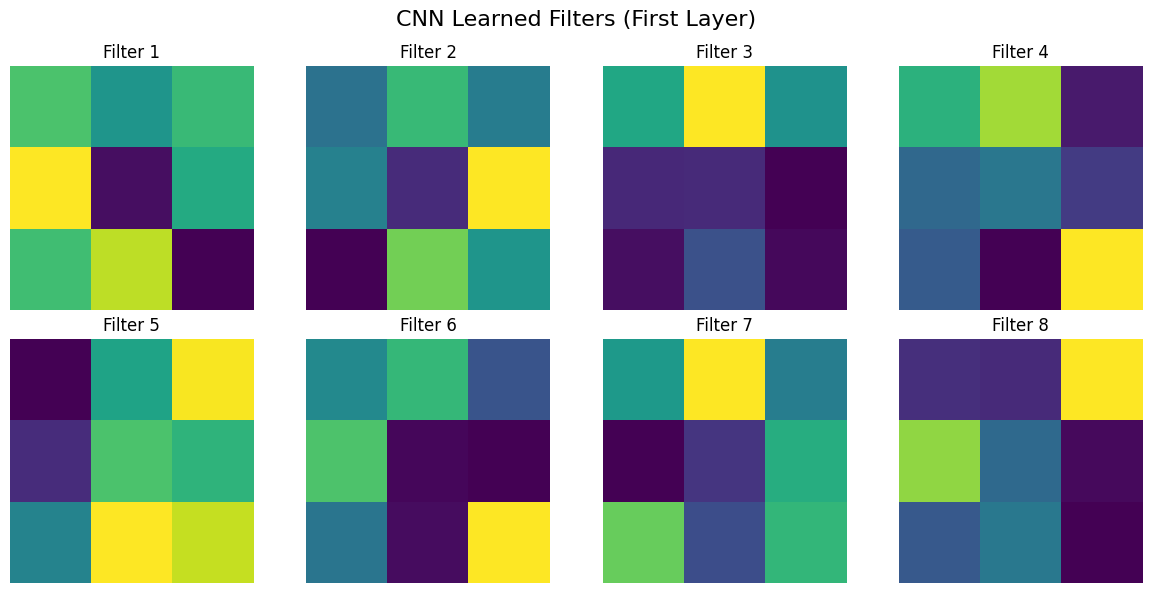

📸 이미지를 업로드해주세요!


Saving car.jpg to car (2).jpg


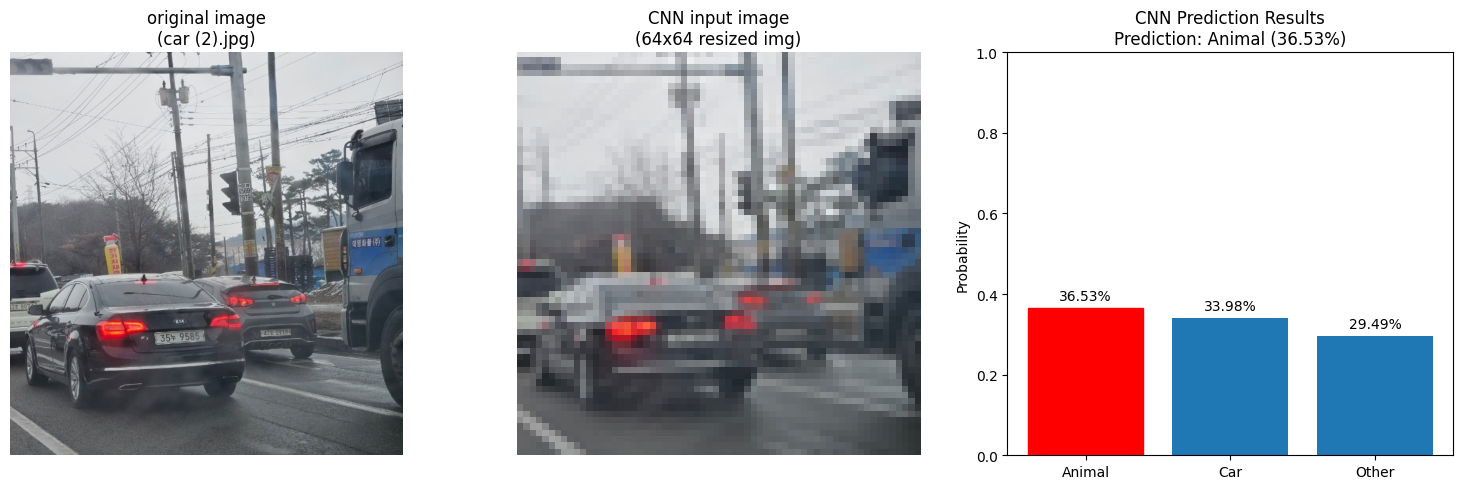


🎯 CNN Prediction Results:
👉 Animal: 36.53%
   Car: 33.98%
   Other: 29.49%
Final Prediction: Animal (Confidence: 36.53%)

🔬 CNN 내부 작동 과정 시각화...
⚠️ 활성화 시각화 중 오류 발생: The layer sequential_3 has never been called and thus has no defined input.
💡 이는 모델 구조나 TensorFlow 버전 이슈일 수 있습니다.
📝 주요 기능(예측)은 정상 작동합니다!

🎓 CNN 데모 완료!
💡 이제 CNN이 어떻게 이미지를 '이해'하는지 보셨습니다!


In [15]:
# 🎮 메인 실행 함수
def run_cnn_demo():
    """
    CNN 교육용 데모 메인 실행
    """
    print("🎉 진짜 CNN 교육용 데모 시작!")
    print("=" * 50)

    # 1. CNN 모델 생성
    model = create_simple_cnn()

    # 2. 모델 구조 확인
    visualize_model_architecture(model)

    # 3. 빠른 훈련 (데모용)
    history = quick_train_with_dummy_data(model)

    # 4. 학습된 필터 시각화
    visualize_cnn_filters(model)

    # 5. 이미지 업로드 및 예측
    original_img, processed_img, image_batch, filename = upload_and_preprocess_image()

    # 6. CNN 예측 및 결과 시각화
    predict_and_visualize(model, original_img, processed_img, image_batch, filename)

    # 7. CNN 내부 작동 과정 시각화
    visualize_intermediate_activations(model, image_batch)

    print("\n🎓 CNN 데모 완료!")
    print("💡 이제 CNN이 어떻게 이미지를 '이해'하는지 보셨습니다!")

# 🚀 데모 실행
print("📚 CNN 교육용 데모 - 실제 신경망으로 이미지 분류 체험")
print("🔥 이번에는 진짜 CNN입니다!")
print()
run_cnn_demo()

TensorFlow 모델은 첫 번째 데이터가 통과해야 완전히 초기화됨

🧠 CNN 구조와 동작 과정 완전 정리 (확장판)
📋 1. CNN 모델 전체 구조
🏗️ 레이어 구성
Sequential([
    # 컨볼루션 블록 1
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2, 2),

    # 컨볼루션 블록 2  
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # 컨볼루션 블록 3
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    # 분류기
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Animal/Car/Other
])
🔢 2. 필터 개수 총정리
레이어   필터 개수   필터 크기   출력 특징맵
Conv2D #1   16개   3×3   16개
Conv2D #2   32개   3×3   32개
Conv2D #3   64개   3×3   64개
총 필터   112개   -   112개
🎨 시각화 vs 실제
실제 사용: 112개 필터 모두 활동
화면 표시: 8개만 보여줌 (공간 제약)
숨겨진 필터: 104개 (보이지 않지만 작동 중)
⚡ 3. ReLU 활성화 함수 적용
🔥 ReLU가 적용되는 위치
Conv2D #1: 각 필터마다 → 16번
Conv2D #2: 각 필터마다 → 32번
Conv2D #3: 각 필터마다 → 64번
Dense: 각 뉴런마다 → 128번
총 ReLU 연산: 240개 위치에서 활성화

🔄 4. 데이터 흐름 (Forward Pass)
📸 이미지 1장의 여행
1️⃣ 입력 이미지: (64, 64, 3)
    ↓ Conv2D(16 filters) + ReLU
    출력: (62, 62, 16) ← 16개 특징맵
    ↓ MaxPooling2D
    출력: (31, 31, 16)

2️⃣ ↓ Conv2D(32 filters) + ReLU  
    출력: (29, 29, 32) ← 32개 특징맵
    ↓ MaxPooling2D
    출력: (14, 14, 32)

3️⃣ ↓ Conv2D(64 filters) + ReLU
    출력: (12, 12, 64) ← 64개 특징맵
    ↓ MaxPooling2D
    출력: (6, 6, 64)

4️⃣ ↓ Flatten
    출력: (2,304,) ← 1차원 변환
    ↓ Dense(128) + ReLU
    출력: (128,)
    ↓ Dropout(0.5)
    ↓ Dense(3) + Softmax
    최종: (3,) → [Animal확률, Car확률, Other확률]
📊 5. 연산량 계산
🔢 이미지 1장 처리 시
컨볼루션 연산: 97,632번
ReLU 활성화: 97,760번
MaxPooling: 3번
Dense 연산: 2번
총 연산: 약 10만 번
🎓 전체 훈련 시 (200샘플 × 3epochs)
처리 이미지: 600장
총 컨볼루션: 58,579,200번
총 ReLU: 58,656,000번
총 연산: 약 6천만 번
🔥 6. 필터 개수 증가 패턴: 16→32→64
🧠 왜 2배씩 증가하는가?
📏 공간 vs 특징의 트레이드오프
입력: (64×64×3)   → 큰 이미지, 기본 정보
  ↓ Conv2D(16) + MaxPool
출력: (31×31×16)  → 중간 크기, 기본 특징들
  ↓ Conv2D(32) + MaxPool  
출력: (14×14×32)  → 작은 크기, 복잡한 특징들
  ↓ Conv2D(64) + MaxPool
출력: (6×6×64)    → 매우 작음, 고수준 특징들
🎯 계층적 특징 학습
레이어   필터 개수   이미지 크기   학습하는 특징   예시
1층   16개   큰 (31×31)   📌 기본 요소   선, 엣지, 색상
2층   32개   중간 (14×14)   📌 조합 패턴   모서리, 텍스처, 곡선
3층   64개   작은 (6×6)   📌 고수준 특징   눈, 바퀴, 귀 등
🔬 동물 사진 분석 실제 예시
1층 (16개 필터): 기본 요소 검출
필터1: 세로 선 검출 |
필터2: 가로 선 검출 ─
필터3: 대각선 검출 / \
필터4-16: 다양한 방향의 엣지들
2층 (32개 필터): 패턴 조합
필터1: 둥근 모양 검출 (눈 후보?)
필터2: 직선 조합 (다리 후보?)
필터3: 곡선 패턴 (꼬리 후보?)
필터4-32: 더 복잡한 형태 조합들
3층 (64개 필터): 완전한 특징
필터1: 완전한 눈 모양
필터2: 동물 귀 형태
필터3: 다리 전체 모양
필터4-64: 동물의 각 부위들
🔢 왜 2의 거듭제곱인가?
📐 표준 CNN 설계 원칙
컴퓨터 친화적: 2진법 시스템 최적화
메모리 효율: GPU 메모리 블록과 일치
수학적 편의: 행렬 연산 최적화
검증된 패턴: 수많은 연구로 입증
🎪 다른 패턴과의 비교
# 표준 패턴 (추천)
model_A = [16, 32, 64]    # 우리 코드
성능: ⭐⭐⭐⭐⭐
🏗️ 정보 보존 법칙
공간 해상도 ↓ × 특징 해상도 ↑ = 정보량 유지
📊 메모리 사용량 분석
1층: 31×31×16 = 15,376개 값 (넓고 얕음)
2층: 14×14×32 = 6,272개 값 (중간)  
3층: 6×6×64 = 2,304개 값 (좁고 깊음)
각 단계에서 정보는 압축되지만 의미는 더 풍부해집니다!

💡 7. 건축물 비유로 이해하기
🏢 CNN = 정보 처리 공장
🏢 1층 (넓은 공간, 16명 직원)
   역할: 원자재(픽셀) 기본 분류
   작업: "이건 선이야", "이건 색깔이야"

🏢 2층 (중간 공간, 32명 직원)  
   역할: 1층 결과물 조합해서 부품 제작
   작업: "선들이 모여 모서리", "색깔들이 모여 패턴"

🏢 3층 (작은 공간, 64명 직원)
   역할: 2층 부품들로 완제품 조립
   작업: "모서리+패턴 = 눈", "곡선+색깔 = 귀"
층이 올라갈수록: 공간↓, 인원↑, 전문성↑, 완성도↑

🔬 8. 망원경 비유
🔭 CNN = 지능형 망원경
🔍 1단계 (광각 렌즈, 16개 센서)
   - 전체적인 형태 파악
   - "뭔가 움직이는 게 있네"

🔍 2단계 (중간 렌즈, 32개 센서)  
   - 부분적인 특징 인식
   - "털이 있고, 네 다리가 있네"

🔍 3단계 (줌 렌즈, 64개 센서)
   - 정밀한 식별
   - "이건 고양이 얼굴이야!"
🎯 9. 핵심 포인트
✅ 실제 CNN의 특징
112개 필터 모두 동시에 작동
계층적 학습: 단순→복잡→고수준
정보 압축: 공간↓, 의미↑
협업 구조: 각 층이 다음 층을 도움
🖼️ 시각화의 한계
화면 제약으로 일부만 표시
실제 성능과 보이는 것은 별개
숨겨진 대부분이 진짜 일꾼
🧠 학습 과정
가중치 업데이트: 112개 필터 모두
역전파: 모든 레이어 통과
특징 학습: 자동으로 최적 패턴 발견
단계적 발전: 기초→응용→완성
🎉 10. 최종 완전 정리
🔄 필터 증가 패턴의 핵심
16→32→64 = "넓게 보고, 깊게 파고, 정확히 맞춘다"

🧩 전체 시스템의 협업
16개 필터: 기초 공사 (엣지, 색상)
32개 필터: 골조 세우기 (패턴, 형태)
64개 필터: 마무리 작업 (완전한 특징)
Dense 레이어: 최종 판단 (분류 결정)
💎 CNN의 지혜
계층적 사고: 단계별로 복잡해짐
효율적 설계: 2의 거듭제곱 패턴
정보 변환: 공간정보 → 의미정보
집단 지능: 112개 필터의 협업
이 모든 것이 합쳐져서 한 장의 사진을 보고 "이건 동물이야!"라고 말할 수 있는 인공지능이 되는 것입니다! 🚀✨🧠